In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.svm import SVC,SVR
from sklearn.datasets import make_classification,make_regression
import joblib
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# Import for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Import for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [50]:
import warnings
warnings.filterwarnings("ignore")


In [51]:
base_path= '/home/mr-arthor/Desktop/CDAC/Practical_Machine_Learning/Lab_Work/Datasets'
Launch_Path= 'Models/'
os.makedirs(Launch_Path, exist_ok=True)


In [52]:
def eda(df, target, type='a'):  # Exploratory Data Analysis


    # Display unique label count
    unique_count = df[target].nunique()
    print("Label Count =", unique_count)

    # Type 'a': Standard preprocessing
    if type == 'a':
        for col in df.select_dtypes(include=['object']).columns:
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
        # Handle missing values
        print(df.isnull().sum())
        df.fillna(df.mean(), inplace=True)  
        x = df.drop(columns=[target])
        y = df[target]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        # Apply StandardScaler and MinMaxScaler
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        print(df.shape)
        return x_train, x_test, y_train, y_test

    # Type 'b': TF-IDF for text data
    if type == 'b':
        df.dropna(inplace=True)
        x = df[target].astype(str)  # Use only the text column for vectorization
        y = df[target]

        # Ensure labels are categorical
        if not y.dtype == 'object':
            label_encoder = LabelEncoder()
            y = label_encoder.fit_transform(y)

        x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

        vectorizer = TfidfVectorizer()
        x_train = vectorizer.fit_transform(x_train_raw)
        x_test = vectorizer.transform(x_test_raw)

        return x_train, x_test, y_train, y_test


In [53]:

def SVC_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        classifier = SVC()
        grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
        print(classification_report(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)


In [54]:
# def SVC_Func(x_train, x_test, y_train, y_test,parameters,CV,Ver,name):
#     classifier = SVC()
#     grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV,verbose=Ver)
#     grid_search.fit(x_train, y_train)
#     print(grid_search.best_params_)
#     y_pred = grid_search.predict(x_test)
#     ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
#     print(classification_report(y_test, y_pred))
#     best_model = grid_search.best_estimator_
#     joblib.dump(best_model, Launch_Path+name+'.pkl')
#     print("Best model saved to 'best_model.pkl'")
   


In [55]:

def SVR_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name,bypass=True):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path) and bypass:
        print("Model already trained and saved at", model_path)
    else:
         
        grid_search = RandomizedSearchCV(SVR(),
                                            param_distributions=parameters,
                                            n_iter=50,
                                          
                                          n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        print("Mean Square Error", mean_squared_error(y_test, y_pred))
        print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
        print("R2 Score", r2_score(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        plt.figure(figsize=(10, 6))
        print("Best model saved to", model_path)


In [56]:
def DTC_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        classifier = DecisionTreeClassifier()
        grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
        print(classification_report(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)
        plt.figure(figsize=(10, 6))

        tree.plot_tree(best_model,filled=True)


In [57]:
def DTR_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        print("Mean Square Error", mean_squared_error(y_test, y_pred))
        print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
        print("R2 Score", r2_score(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)
        tree.plot_tree(best_model,filled=True)


In [58]:
def RFC_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        classifier = RandomForestClassifier()
        grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
        print(classification_report(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)


In [59]:
def RFR_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    model_path = Launch_Path + name + '.pkl'
    
    if os.path.exists(model_path):
        print("Model already trained and saved at", model_path)
    else:
        grid_search = GridSearchCV(RandomForestRegressor(), param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
        y_pred = grid_search.predict(x_test)
        print("Mean Square Error", mean_squared_error(y_test, y_pred))
        print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
        print("R2 Score", r2_score(y_test, y_pred))
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, model_path)
        print("Best model saved to", model_path)


In [60]:
# def SVR_Func(x_train, x_test, y_train, y_test,parameters,CV,Ver,name):
#     classifier = SVR()
#     grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV,verbose=Ver)
#     grid_search.fit(x_train, y_train)
#     print(grid_search.best_params_)
#     y_pred = grid_search.predict(x_test)
#     cm = confusion_matrix(y_test, y_pred)
#     print(classification_report(y_test, y_pred))
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()
#     plt.show()
#     best_model = grid_search.best_estimator_
#     joblib.dump(best_model, Launch_Path+name+'.pkl')
#     print("Best model saved to 'best_model.pkl'")
   

In [61]:
df_iris = pd.read_csv(base_path+'/IRIS.csv')


In [62]:
x_train, x_test, y_train, y_test = eda(df_iris,'species')


Label Count = 3
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
(150, 5)


In [63]:
parameters= [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}] #parameters for SVC


In [64]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'iris') #SVC Function


Model already trained and saved at Models/iris.pkl


In [65]:
df_Cancer = pd.read_csv(base_path+'/Cancer.csv')


In [66]:
df_Cancer['diagnosis'].nunique()



2

In [67]:
df_Cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [68]:

df_Cancer = df_Cancer.drop(columns=['id','Unnamed: 32'])


In [69]:
x_train, x_test, y_train, y_test = eda(df_Cancer,'diagnosis')


Label Count = 2
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
(569, 31)


In [70]:
parameters = [{'C': [0.1, 1, 10, 100, 1000,.0001], 'kernel': ['poly']}] #parameters for SVR


In [71]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'Cancer') #SVR Function


Model already trained and saved at Models/Cancer.pkl


In [72]:
df_Wine = pd.read_csv(base_path+'/Wine.csv')


In [73]:
df_Wine.shape


(178, 15)

In [74]:
df_Wine.head()


,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [75]:
df_Wine.nunique()


class_label               3
class_name                3
alcohol                 126
malic_acid              133
ash                      79
alcalinity_of_ash        63
magnesium                53
total_phenols            97
flavanoids              132
nonflavanoid_phenols     39
proanthocyanins         101
color_intensity         132
hue                      78
od280                   122
proline                 121
dtype: int64

In [76]:
x_train, x_test, y_train, y_test = eda(df_Wine,'class_name')


Label Count = 3
class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64
(178, 15)


In [77]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}] #parameters for SVC


In [78]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'wine') #SVR Function


Model already trained and saved at Models/wine.pkl


In [79]:
from sklearn.datasets import load_digits
df_digits = load_digits()   


In [80]:
df_digits = pd.DataFrame(data= np.c_[df_digits['data'], df_digits['target']])


In [81]:

subset = df_digits.groupby(df_digits[64],).apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

subset.to_csv('/home/mr-arthor/Desktop/Digits.csv', index=False)


In [82]:
subset[64].value_counts()  


64
0.0    100
1.0    100
2.0    100
3.0    100
4.0    100
5.0    100
6.0    100
7.0    100
8.0    100
9.0    100
Name: count, dtype: int64

In [83]:
df_digits.shape


(1797, 65)

In [84]:
df_digits[64].value_counts()


64
3.0    183
1.0    182
5.0    182
4.0    181
6.0    181
9.0    180
7.0    179
0.0    178
2.0    177
8.0    174
Name: count, dtype: int64

In [85]:
x_train, x_test, y_train, y_test = train_test_split(df_digits.drop(columns=[64]), df_digits[64], test_size=0.2, random_state=42,stratify=df_digits[64]) 


In [86]:
y_train.nunique(), y_test.nunique()


(10, 10)

In [87]:
df_digits.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [88]:
x_train, x_test, y_train, y_test = eda(df_digits,64)


Label Count = 10
0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64
(1797, 65)


In [89]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'digits') #SVR Function


Model already trained and saved at Models/digits.pkl


In [90]:
X, y = make_classification(
    n_samples=1000,    # Number of samples
    n_features=20,     # Number of features
    n_informative=15,  # Number of informative features
    n_redundant=5,     # Number of redundant features
    random_state=42
)


In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [92]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf','linear']}] #parameters for SVR


Fitting 6 folds for each of 10 candidates, totalling 60 fits


[CV 2/6] END .................C=0.1, kernel=rbf;, score=0.851 total time=   0.1s
[CV 3/6] END ..............C=0.1, kernel=linear;, score=0.827 total time=   0.1s
[CV 4/6] END ..............C=0.1, kernel=linear;, score=0.759 total time=   0.1s
[CV 5/6] END ..............C=0.1, kernel=linear;, score=0.850 total time=   0.1s
[CV 6/6] END ..............C=0.1, kernel=linear;, score=0.805 total time=   0.1s
[CV 1/6] END ...................C=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/6] END ..............C=0.1, kernel=linear;, score=0.754 total time=   0.1s
[CV 2/6] END ...................C=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 3/6] END ...................C=1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 4/6] END ...................C=1, kernel=rbf;, score=0.910 total time=   0.0s
[CV 5/6] END ...................C=1, kernel=rbf;, score=0.917 total time=   0.1s
[CV 6/6] END ...................C=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 6/6] END ...............

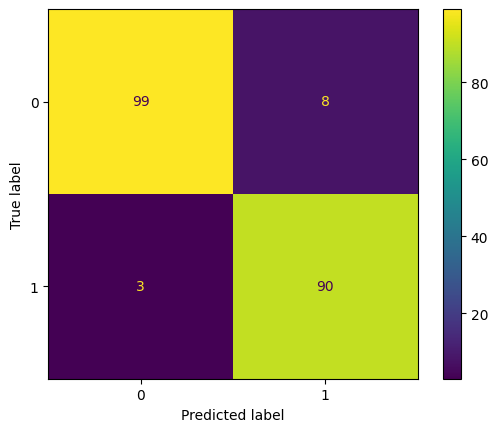

In [93]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,"Synthetic") #SVR Function


In [94]:
df_Titanic = pd.read_csv(base_path+'/Titanic.csv')


In [95]:
df_Titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [96]:
df_Titanic.isnull().sum()
df_Titanic.drop(columns=['body'],inplace=True)


In [97]:
x_train, x_test, y_train, y_test = eda(df_Titanic,'survived')


Label Count = 2
pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin          0
embarked       0
boat           0
home.dest      0
dtype: int64
(1309, 13)


In [98]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}] #parameters for SVR


{'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       144
           1       0.99      0.92      0.95       118

    accuracy                           0.96       262
   macro avg       0.96      0.95      0.96       262
weighted avg       0.96      0.96      0.96       262

Best model saved to Models/Titanic.pkl


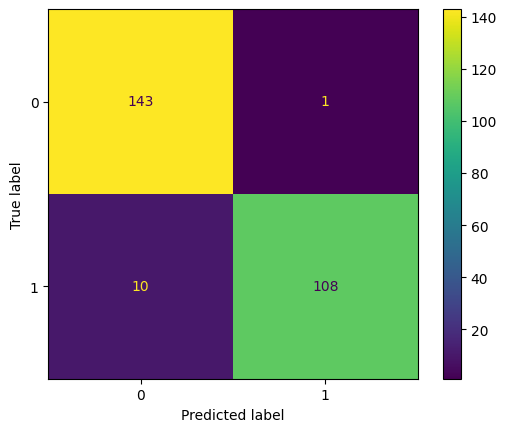

In [99]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'Titanic') #SVR Function


In [100]:
df_Text = pd.read_csv(base_path+'/BBC News Train.csv')


In [101]:
x_train, x_test, y_train, y_test = eda(df_Text,'Category','b')


Label Count = 5


In [102]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}] #parameters for SVR


{'C': 0.1, 'kernel': 'rbf'}
               precision    recall  f1-score   support

     business       1.00      1.00      1.00        64
entertainment       1.00      1.00      1.00        63
     politics       1.00      1.00      1.00        53
        sport       1.00      1.00      1.00        65
         tech       1.00      1.00      1.00        53

     accuracy                           1.00       298
    macro avg       1.00      1.00      1.00       298
 weighted avg       1.00      1.00      1.00       298

Best model saved to Models/Txt.pkl


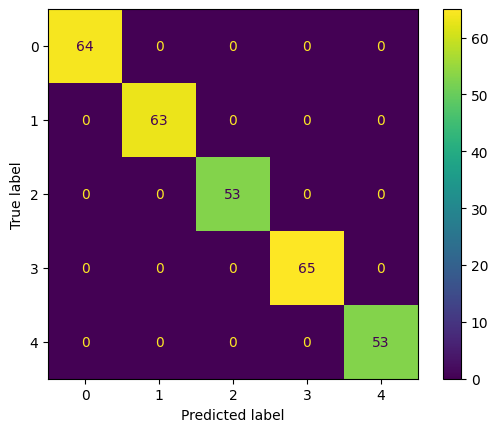

In [103]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'Txt') #SVR Function


In [104]:
df_Credit = pd.read_csv(base_path+'/creditcard.csv')    


In [105]:
x_train, x_test, y_train, y_test = eda(df_Credit,'Class')


Label Count = 2
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
(284807, 31)


In [106]:
parameters = [{'C': [0.1, 1, 10, 100, 1000] ,'kernel': ['rbf']}] #parameters for SVR


Fitting 6 folds for each of 5 candidates, totalling 30 fits
[CV 2/6] END ...................C=1, kernel=rbf;, score=0.999 total time=  27.9s
[CV 6/6] END .................C=0.1, kernel=rbf;, score=0.999 total time=  30.5s
[CV 5/6] END .................C=0.1, kernel=rbf;, score=0.999 total time=  31.5s
[CV 1/6] END ...................C=1, kernel=rbf;, score=0.999 total time=  32.1s
[CV 1/6] END .................C=0.1, kernel=rbf;, score=0.999 total time=  33.1s
[CV 2/6] END .................C=0.1, kernel=rbf;, score=0.999 total time=  34.6s
[CV 4/6] END .................C=0.1, kernel=rbf;, score=0.999 total time=  35.4s
[CV 3/6] END .................C=0.1, kernel=rbf;, score=0.999 total time=  37.7s
[CV 3/6] END ...................C=1, kernel=rbf;, score=0.999 total time=  29.0s
[CV 4/6] END ...................C=1, kernel=rbf;, score=0.999 total time=  27.8s
[CV 5/6] END ...................C=1, kernel=rbf;, score=0.999 total time=  28.5s
[CV 6/6] END ...................C=1, kernel=rbf;,

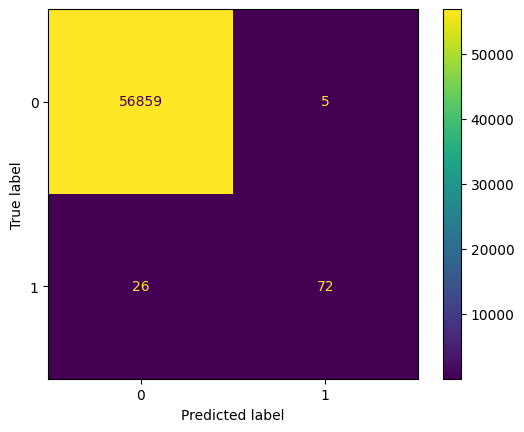

In [107]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,"CreditCard") #SVR Function


SVR 

In [108]:
from sklearn.datasets import fetch_california_housing
df_Housing = fetch_california_housing()
df_Housing = pd.DataFrame(data= np.c_[df_Housing['data'], df_Housing['target']])


In [109]:
df_Housing.head()


,0,1,2,3,4,5,6,7,8
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [110]:
x_train, x_test, y_train, y_test = eda(df_Housing,8)


Label Count = 3842
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
(20640, 9)


In [111]:
parameters  = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}] #parameters for SVR


In [112]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,2,3,"Houses") #SVR Function


Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=  21.5s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.516 total time=  22.7s
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=  22.8s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.520 total time=  23.7s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.126 total time=  24.3s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.135 total time=  24.7s
[CV 1/2] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.042 total time=  26.4s
[CV 2/2] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.029 total time=  25.2s
[CV 1/2] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.061 total time=  21.6s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.639 total time=  20.4s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.642 total time=  20.2s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;

<Figure size 1000x600 with 0 Axes>

In [113]:
df_Auto = pd.read_csv(base_path+'/MPG.csv')


In [114]:
df_Auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [115]:
x_train, x_test, y_train, y_test = eda(df_Auto,'mpg')


Label Count = 129
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
(398, 9)


In [116]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf','linear','poly']}] #parameters for SVR


In [117]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'Cars') #SVR Function


Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2] END .......C=1, gamma=0.1, kernel=poly;, score=0.125 total time=   0.0s
[CV 2/2] END .......C=1, gamma=0.1, kernel=poly;, score=0.143 total time=   0.0s
[CV 1/2] END ..C=0.1, gamma=0.001, kernel=poly;, score=-0.058 total time=   0.0s
[CV 2/2] END ..C=0.1, gamma=0.001, kernel=poly;, score=-0.002 total time=   0.0s
[CV 1/2] END ...C=100, gamma=0.1, kernel=linear;, score=0.801 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.519 total time=   0.0s
[CV 2/2] END ...C=100, gamma=0.1, kernel=linear;, score=0.781 total time=   0.0s
[CV 1/2] END ..C=100, gamma=0.001, kernel=poly;, score=-0.058 total time=   0.0s[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.513 total time=   0.0s

[CV 2/2] END ..C=100, gamma=0.001, kernel=poly;, score=-0.002 total time=   0.0s
[CV 1/2] END ...C=1000, gamma=0.01, kernel=poly;, score=0.125 total time=   0.0s
[CV 2/2] END ...C=1000, gamma=0.01, kernel=poly

<Figure size 1000x600 with 0 Axes>

In [118]:
df_regression = make_regression(
    n_samples=1000,    # Number of samples
    n_features=20,     # Number of features
    n_informative=15,  # Number of informative features
    noise=0.1,         # Standard deviation of the gaussian noise applied to the output
    random_state=42
)


In [119]:
x_train, x_test, y_train, y_test = train_test_split(df_regression[0], df_regression[1], test_size=0.2, random_state=0)


In [120]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}] #parameters for SVR


In [121]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'SyntheticRegression') #SVR Function


Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 1/2] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.035 total time=   0.1s
[CV 2/2] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.1s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 2/2] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.073 total time=   0.1s
[CV 2/2] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.070 total time=   0.1s
[CV 1/2] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.036 total time=   0.1s
[CV 1/2] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.033 total time=   0.1s
[CV 1/2] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 1/2] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.022 total time=   0.0s
[CV 1/2] END .........C=1, gamma=1, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 2/2] END ..C=0.1, gamma=0.0001, kernel=rbf;,

<Figure size 1000x600 with 0 Axes>

In [122]:
df_AirBnb = pd.read_csv(base_path+'/Airbnb_Open_Data.csv')


In [123]:
df_AirBnb.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [124]:
df_AirBnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [125]:
df_AirBnb.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [126]:
df_AirBnb.shape


(102599, 26)

In [127]:
df_AirBnb_=df_AirBnb.iloc[:15000]


In [128]:
df_AirBnb_.drop(columns=['id','NAME','host id','host name','last review','reviews per month'],inplace=True)


In [129]:
df_AirBnb_.shape


(15000, 20)

In [130]:
x_train, x_test, y_train, y_test = eda(df_AirBnb_,'price')


Label Count = 1151
host_identity_verified              0
neighbourhood group                 0
neighbourhood                       0
lat                                 8
long                                8
country                             0
country code                        0
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                 143
price                               0
service fee                         0
minimum nights                    160
number of reviews                  16
review rate number                103
calculated host listings count     23
availability 365                  148
house_rules                         0
license                             0
dtype: int64
(15000, 20)


In [131]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}] #parameters for SVR


In [132]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,6,3,'AirBnb',False) #SVR Function


Fitting 6 folds for each of 5 candidates, totalling 30 fits
[CV 3/6] END .................C=0.1, kernel=rbf;, score=0.062 total time=  18.9s
[CV 6/6] END .................C=0.1, kernel=rbf;, score=0.057 total time=  20.7s
[CV 1/6] END .................C=0.1, kernel=rbf;, score=0.058 total time=  22.3s
[CV 2/6] END .................C=0.1, kernel=rbf;, score=0.059 total time=  22.7s
[CV 4/6] END .................C=0.1, kernel=rbf;, score=0.059 total time=  22.7s
[CV 2/6] END ...................C=1, kernel=rbf;, score=0.185 total time=  22.8s
[CV 5/6] END .................C=0.1, kernel=rbf;, score=0.065 total time=  23.2s
[CV 1/6] END ...................C=1, kernel=rbf;, score=0.188 total time=  23.3s
[CV 3/6] END ...................C=1, kernel=rbf;, score=0.195 total time=  24.5s
[CV 4/6] END ...................C=1, kernel=rbf;, score=0.184 total time=  23.5s
[CV 2/6] END ..................C=10, kernel=rbf;, score=0.248 total time=  22.9s
[CV 4/6] END ..................C=10, kernel=rbf;,

<Figure size 1000x600 with 0 Axes>

In [133]:
df_Airlines = pd.read_csv(base_path+'/Airline Delay.csv')


In [134]:
df_Airlines.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,0.12,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,0.04,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,1.60,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,1.83,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,5.22,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0


In [135]:
df_Airlines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [136]:
x_train, x_test, y_train, y_test = eda(df_Airlines,'arr_delay')


Label Count = 2032
year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64
(3351, 21)


In [137]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['poly']}] #parameters for SVR


In [138]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,6,3,'Airlines') #SVR Function


Fitting 6 folds for each of 5 candidates, totalling 30 fits
[CV 5/6] END ...............C=0.1, kernel=poly;, score=-0.059 total time=   0.7s
[CV 6/6] END ...............C=0.1, kernel=poly;, score=-0.080 total time=   0.7s
[CV 1/6] END ...............C=0.1, kernel=poly;, score=-0.088 total time=   0.8s
[CV 4/6] END ...............C=0.1, kernel=poly;, score=-0.068 total time=   0.8s
[CV 2/6] END ...............C=0.1, kernel=poly;, score=-0.066 total time=   0.9s
[CV 3/6] END ...............C=0.1, kernel=poly;, score=-0.057 total time=   0.9s
[CV 1/6] END .................C=1, kernel=poly;, score=-0.067 total time=   0.9s
[CV 2/6] END .................C=1, kernel=poly;, score=-0.048 total time=   1.1s
[CV 4/6] END .................C=1, kernel=poly;, score=-0.057 total time=   0.8s
[CV 5/6] END .................C=1, kernel=poly;, score=-0.042 total time=   0.8s
[CV 6/6] END .................C=1, kernel=poly;, score=-0.069 total time=   0.8s
[CV 3/6] END .................C=1, kernel=poly;, 

<Figure size 1000x600 with 0 Axes>

In [139]:
df_Weather = pd.read_csv(base_path+'/weatherHistory.csv')


In [140]:
df_Weather.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [141]:
df_Weather.shape


(96453, 12)

In [142]:
df_Weather = df_Weather.iloc[:25000]


In [143]:
df_Weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            25000 non-null  object 
 1   Summary                   25000 non-null  object 
 2   Precip Type               25000 non-null  object 
 3   Temperature (C)           25000 non-null  float64
 4   Apparent Temperature (C)  25000 non-null  float64
 5   Humidity                  25000 non-null  float64
 6   Wind Speed (km/h)         25000 non-null  float64
 7   Wind Bearing (degrees)    25000 non-null  float64
 8   Visibility (km)           25000 non-null  float64
 9   Loud Cover                25000 non-null  float64
 10  Pressure (millibars)      25000 non-null  float64
 11  Daily Summary             25000 non-null  object 
dtypes: float64(8), object(4)
memory usage: 2.3+ MB


In [144]:
df_Weather.drop(columns=['Formatted Date','Summary','Precip Type','Daily Summary'],inplace=True)


In [145]:
x_train, x_test, y_train, y_test = eda(df_Weather,'Temperature (C)')


Label Count = 5787
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64
(25000, 8)


In [146]:
parameters = [{'C': [0.1, 1, 10], 'kernel': ['poly']}] #parameters for SVR


In [147]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'Weather') #SVR Function


Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 2/2] END ................C=0.1, kernel=poly;, score=0.983 total time=  11.8s
[CV 1/2] END ................C=0.1, kernel=poly;, score=0.983 total time=  16.0s
[CV 1/2] END ..................C=1, kernel=poly;, score=0.994 total time=  16.9s
[CV 2/2] END ..................C=1, kernel=poly;, score=0.995 total time=  20.0s
[CV 2/2] END .................C=10, kernel=poly;, score=0.997 total time=  47.1s
[CV 1/2] END .................C=10, kernel=poly;, score=0.997 total time=  47.9s
{'kernel': 'poly', 'C': 10}
Mean Square Error 0.2642550871493365
Mean Absolute Error 0.33237777307756683
R2 Score 0.9970544170029154
Best model saved to Models/Weather.pkl


<Figure size 1000x600 with 0 Axes>

In [148]:
df_CarPrice = pd.read_csv(base_path+'/cardekho_imputated.csv')


In [149]:
df_CarPrice.head()  


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [150]:
df_CarPrice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [151]:
x_train, x_test, y_train, y_test = eda(df_CarPrice,'selling_price')


Label Count = 1086
Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64
(15411, 14)


In [152]:
parameters = [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}] #parameters for SVR


In [153]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,3,3,'CarPrice',True) #SVR Function


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.066 total time=  20.6s
[CV 3/3] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.065 total time=  23.4s
[CV 2/3] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.043 total time=  23.4s
[CV 1/3] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.066 total time=  24.9s
[CV 3/3] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.065 total time=  25.6s
[CV 2/3] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.043 total time=  26.7s
[CV 2/3] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.043 total time=  28.1s
[CV 1/3] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.066 total time=  29.2s
[CV 1/3] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.066 total time=  24.4s
[CV 3/3] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.065 total time=  29.7s
[CV 3/3] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.065 total time=  23.4s
[CV 2/3] END ...C=0.1, gamma=0.001, kernel=rbf;,

<Figure size 1000x600 with 0 Axes>

Decision tree Classification

In [154]:
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [155]:
x_train, x_test, y_train, y_test = eda(df_iris,'species')


Label Count = 3
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
(150, 5)


In [156]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 1/6] END .......................max_depth=1;, score=0.700 total time=   0.0s
[CV 3/6] END .......................max_depth=1;, score=0.700 total time=   0.0s


[CV 3/6] END .......................max_depth=2;, score=0.850 total time=   0.0s
[CV 4/6] END .......................max_depth=2;, score=0.900 total time=   0.0s
[CV 5/6] END .......................max_depth=2;, score=0.950 total time=   0.0s
[CV 6/6] END .......................max_depth=2;, score=0.900 total time=   0.0s
[CV 1/6] END .......................max_depth=3;, score=0.950 total time=   0.0s
[CV 6/6] END .......................max_depth=1;, score=0.650 total time=   0.0s
[CV 3/6] END .......................max_depth=3;, score=0.900 total time=   0.0s
[CV 2/6] END .......................max_depth=3;, score=1.000 total time=   0.0s
[CV 4/6] END .......................max_depth=3;, score=0.900 total time=   0.0s
[CV 1/6] END .......................max_depth=2;, score=0.950 total time=   0.0s
[CV 1/6] END .......................max_depth=4;, score=0.950 total time=   0.0s
[CV 5/6] END .......................max_depth=3;, score=1.000 total time=   0.0s
[CV 3/6] END ...............

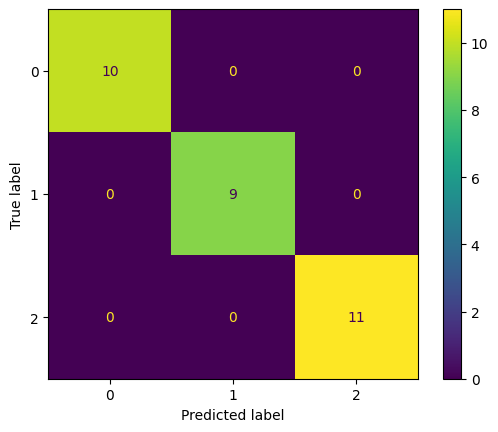

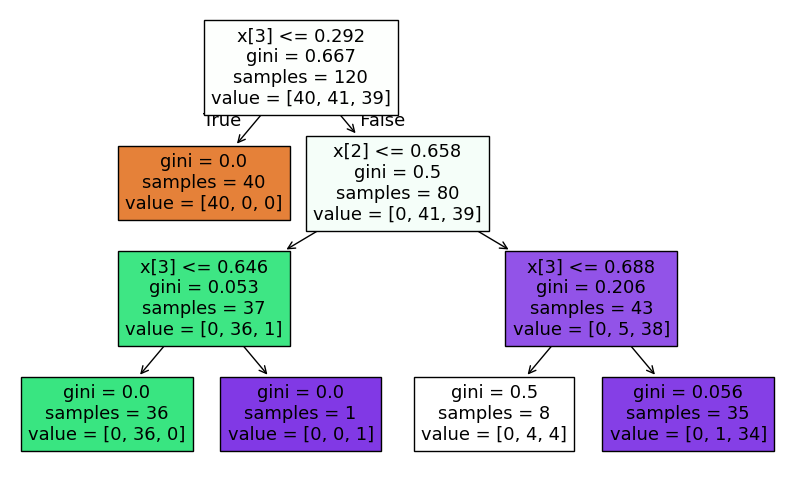

In [157]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'irisDTC') #DTC Function


In [158]:
df_Titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,21,0,29.00,0,0,187,211.3375,43,2,11,308
1,1,1,23,1,0.92,1,2,49,151.5500,79,2,2,230
2,1,0,24,0,2.00,1,2,49,151.5500,79,2,27,230
3,1,0,25,1,30.00,1,2,49,151.5500,79,2,27,230
4,1,0,26,0,25.00,1,2,49,151.5500,79,2,27,230


In [159]:
x_train, x_test, y_train, y_test = eda(df_Titanic,'survived')


Label Count = 2
pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64
(1309, 13)


In [160]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 2/6] END .......................max_depth=1;, score=0.989 total time=   0.0s
[CV 1/6] END .......................max_depth=1;, score=0.966 total time=   0.0s
[CV 3/6] END .......................max_depth=1;, score=0.977 total time=   0.0s
[CV 5/6] END .......................max_depth=1;, score=0.971 total time=   0.0s
[CV 4/6] END .......................max_depth=1;, score=0.977 total time=   0.0s
[CV 6/6] END .......................max_depth=1;, score=0.977 total time=   0.0s
[CV 1/6] END .......................max_depth=2;, score=0.966 total time=   0.0s
[CV 2/6] END .......................max_depth=2;, score=0.989 total time=   0.0s
[CV 4/6] END .......................max_depth=2;, score=0.977 total time=   0.0s[CV 3/6] END .......................max_depth=2;, score=0.977 total time=   0.0s

[CV 5/6] END .......................max_depth=2;, score=0.971 total time=   0.0s
[CV 2/6] END .......................max_depth=3;

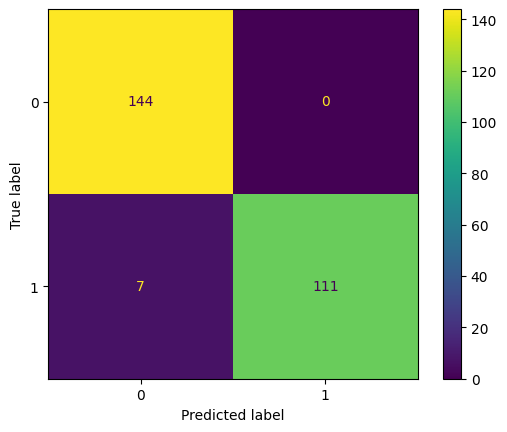

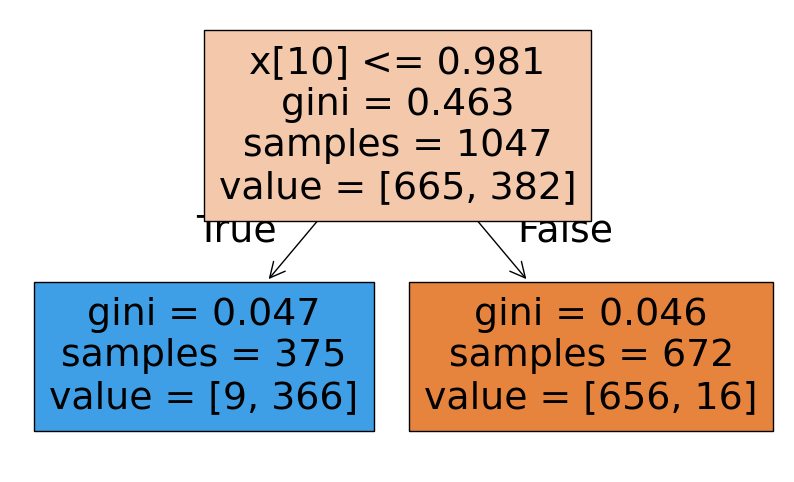

In [161]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'TitanicDTC') #DTC Function


In [162]:
df_Cancer.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [163]:
x_train, x_test, y_train, y_test = eda(df_Cancer,'diagnosis')


Label Count = 2
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
(569, 31)


In [164]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 1/6] END .......................max_depth=1;, score=0.882 total time=   0.0s
[CV 3/6] END .......................max_depth=1;, score=0.895 total time=   0.0s
[CV 2/6] END .......................max_depth=1;, score=0.895 total time=   0.0s
[CV 4/6] END .......................max_depth=1;, score=0.908 total time=   0.0s
[CV 5/6] END .......................max_depth=1;, score=0.895 total time=   0.0s
[CV 6/6] END .......................max_depth=1;, score=0.867 total time=   0.0s
[CV 1/6] END .......................max_depth=2;, score=0.895 total time=   0.0s
[CV 2/6] END .......................max_depth=2;, score=0.947 total time=   0.0s
[CV 4/6] END .......................max_depth=2;, score=0.921 total time=   0.0s
[CV 5/6] END .......................max_depth=2;, score=0.921 total time=   0.0s
[CV 3/6] END .......................max_depth=2;, score=0.908 total time=   0.0s
[CV 6/6] END .......................max_depth=2;

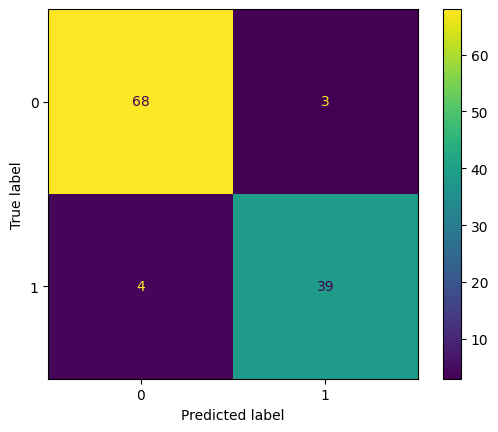

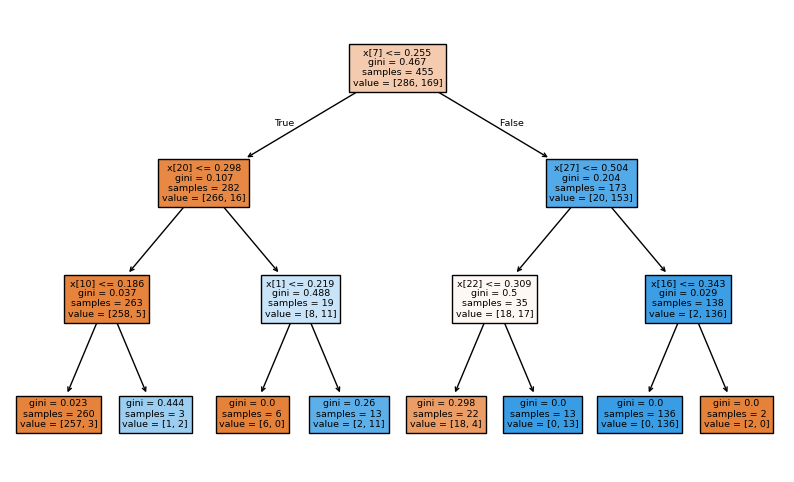

In [165]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'CancerDTC') #DTC Function


In [166]:
df_Heart = pd.read_csv(base_path+'/heart.csv')


In [167]:
df_Heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [168]:
x_train, x_test, y_train, y_test = eda(df_Heart,'target')


Label Count = 2
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
(1025, 14)


In [169]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC   


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 1/6] END .......................max_depth=1;, score=0.788 total time=   0.0s
[CV 2/6] END .......................max_depth=1;, score=0.774 total time=   0.0s
[CV 3/6] END .......................max_depth=1;, score=0.818 total time=   0.0s
[CV 4/6] END .......................max_depth=1;, score=0.730 total time=   0.0s
[CV 6/6] END .......................max_depth=1;, score=0.728 total time=   0.0s
[CV 5/6] END .......................max_depth=1;, score=0.735 total time=   0.0s
[CV 1/6] END .......................max_depth=2;, score=0.774 total time=   0.0s
[CV 2/6] END .......................max_depth=2;, score=0.759 total time=   0.0s
[CV 3/6] END .......................max_depth=2;, score=0.752 total time=   0.0s
[CV 4/6] END .......................max_depth=2;, score=0.737 total time=   0.0s
[CV 5/6] END .......................max_depth=2;, score=0.735 total time=   0.0s
[CV 6/6] END .......................max_depth=2;

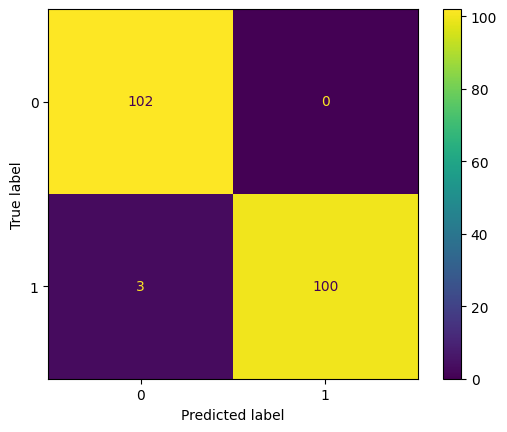

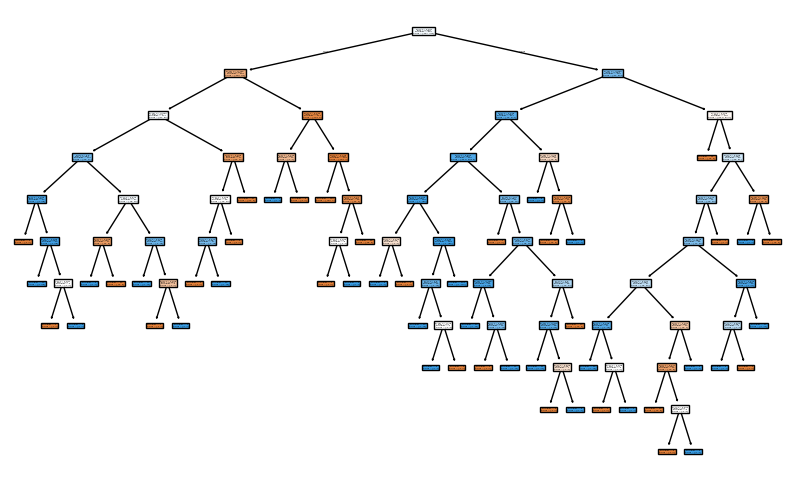

In [170]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'HeartDTC') #DTC Function


In [171]:
df_Wine.head()


,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [172]:
x_train, x_test, y_train, y_test = eda(df_Wine,'class_name')


Label Count = 3
class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64
(178, 15)


In [173]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 1/6] END .......................max_depth=1;, score=0.708 total time=   0.0s
[CV 2/6] END .......................max_depth=1;, score=0.708 total time=   0.0s
[CV 3/6] END .......................max_depth=1;, score=0.708 total time=   0.0s
[CV 4/6] END .......................max_depth=1;, score=0.708 total time=   0.0s
[CV 5/6] END .......................max_depth=1;, score=0.739 total time=   0.0s
[CV 6/6] END .......................max_depth=1;, score=0.739 total time=   0.0s
[CV 1/6] END .......................max_depth=2;, score=1.000 total time=   0.0s
[CV 2/6] END .......................max_depth=2;, score=1.000 total time=   0.0s
[CV 3/6] END .......................max_depth=2;, score=1.000 total time=   0.0s
[CV 4/6] END .......................max_depth=2;, score=1.000 total time=   0.0s
[CV 5/6] END .......................max_depth=2;, score=1.000 total time=   0.0s
[CV 1/6] END .......................max_depth=3;

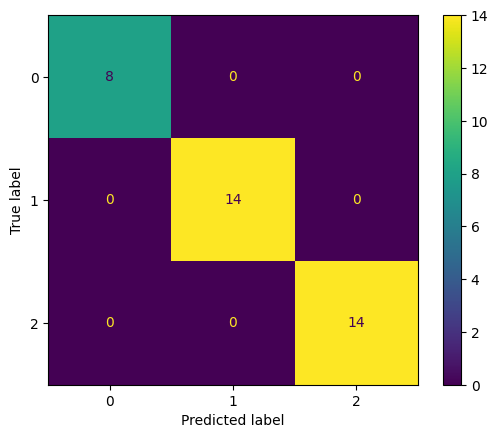

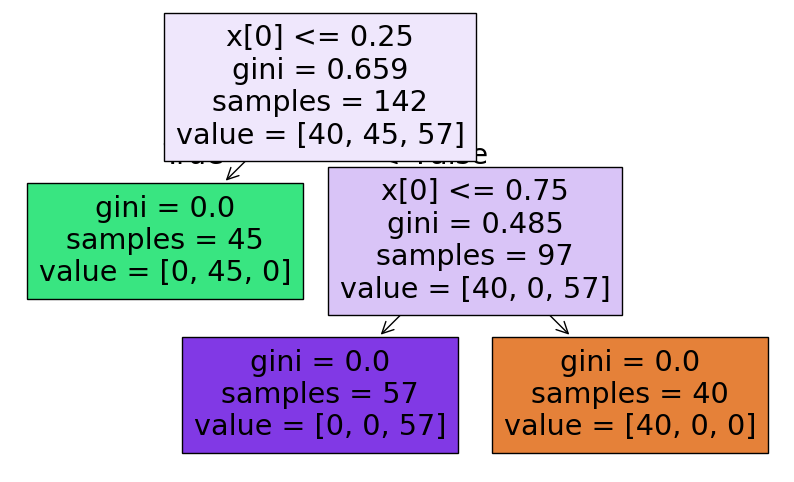

In [174]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'WineDTC') #DTC Function


In [175]:
df_Diabetes = pd.read_csv(base_path+'/Diabetes.csv')


In [176]:
df_Diabetes.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [177]:
x_train, x_test, y_train, y_test = eda(df_Diabetes,'diabetes')


Label Count = 2
pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64
(768, 9)


In [178]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


{'max_depth': 4}
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.69      0.70       154

Best model saved to Models/DiabetesDTC.pkl


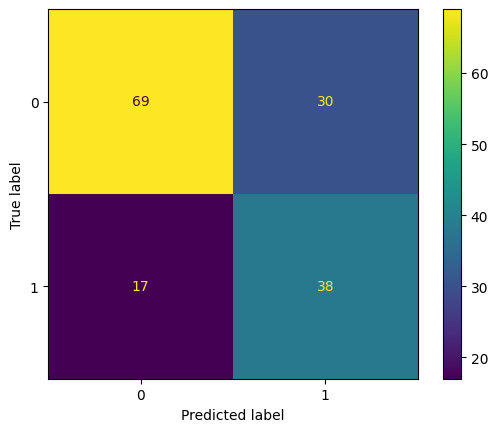

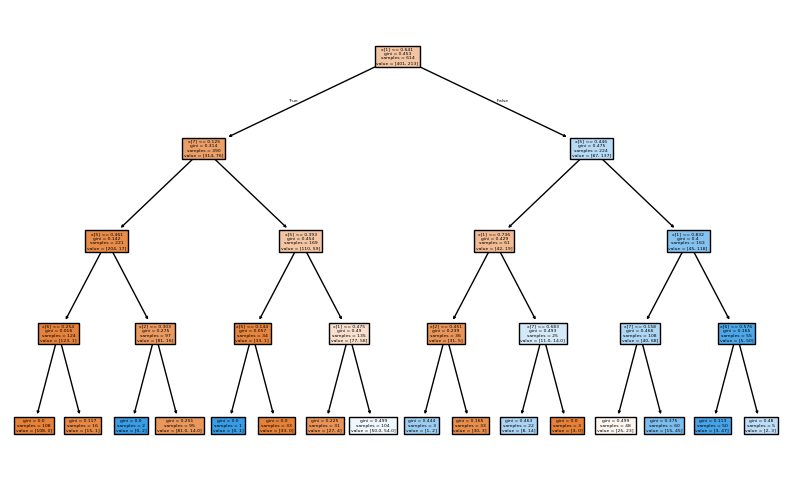

In [179]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'DiabetesDTC') #DTC Function


In [180]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
df_mushroom = pd.concat([X, y], axis=1) 


In [181]:
df_mushroom.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


In [182]:
x_train, x_test, y_train, y_test = eda(df_mushroom,'poisonous')


Label Count = 2
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64
(8124, 23)


In [183]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


Fitting 60 folds for each of 10 candidates, totalling 600 fits
[CV 2/60] END ......................max_depth=1;, score=0.789 total time=   0.0s
[CV 4/60] END ......................max_depth=1;, score=0.780 total time=   0.0s
[CV 1/60] END ......................max_depth=1;, score=0.734 total time=   0.0s
[CV 3/60] END ......................max_depth=1;, score=0.789 total time=   0.0s
[CV 5/60] END ......................max_depth=1;, score=0.780 total time=   0.0s
[CV 6/60] END ......................max_depth=1;, score=0.780 total time=   0.0s
[CV 7/60] END ......................max_depth=1;, score=0.734 total time=   0.0s
[CV 9/60] END ......................max_depth=1;, score=0.771 total time=   0.0s
[CV 8/60] END ......................max_depth=1;, score=0.771 total time=   0.0s
[CV 11/60] END .....................max_depth=1;, score=0.725 total time=   0.0s
[CV 12/60] END .....................max_depth=1;, score=0.771 total time=   0.0s
[CV 10/60] END .....................max_depth=

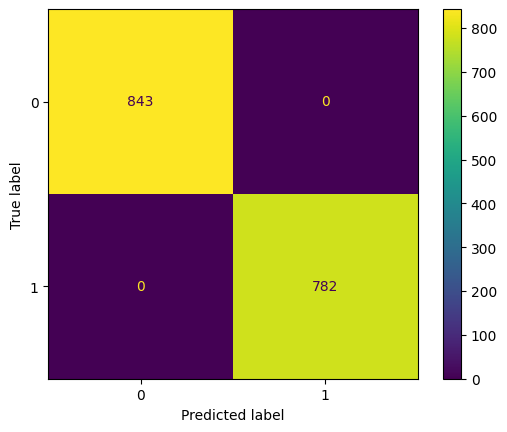

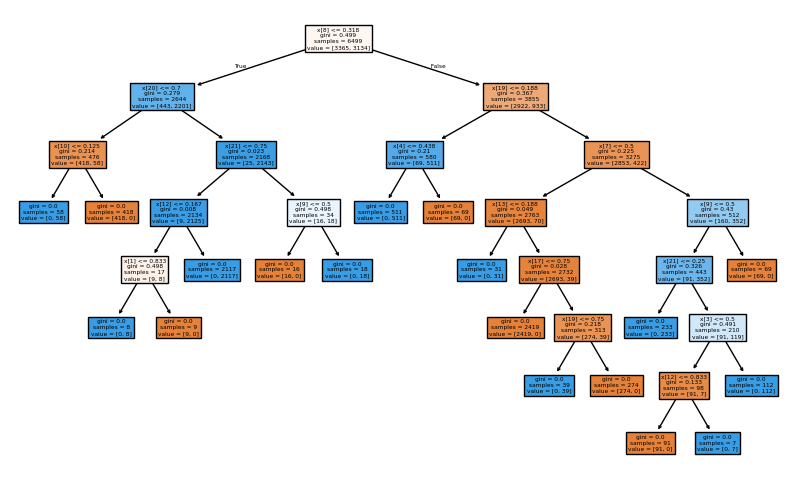

In [184]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,60,3,'MushroomDTC') #DTC Function


In [185]:
df_digits


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [186]:
x_train, x_test, y_train, y_test = eda(df_digits,64)


Label Count = 10
0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64
(1797, 65)


In [187]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 1/6] END .......................max_depth=1;, score=0.204 total time=   0.0s
[CV 2/6] END .......................max_depth=1;, score=0.204 total time=   0.0s
[CV 3/6] END .......................max_depth=1;, score=0.212 total time=   0.0s
[CV 4/6] END .......................max_depth=1;, score=0.209 total time=   0.0s
[CV 5/6] END .......................max_depth=1;, score=0.201 total time=   0.0s
[CV 6/6] END .......................max_depth=1;, score=0.209 total time=   0.0s
[CV 1/6] END .......................max_depth=2;, score=0.338 total time=   0.0s
[CV 3/6] END .......................max_depth=2;, score=0.317 total time=   0.0s
[CV 4/6] END .......................max_depth=2;, score=0.318 total time=   0.0s
[CV 2/6] END .......................max_depth=2;, score=0.325 total time=   0.0s
[CV 6/6] END .......................max_depth=2;, score=0.322 total time=   0.0s
[CV 5/6] END .......................max_depth=2;

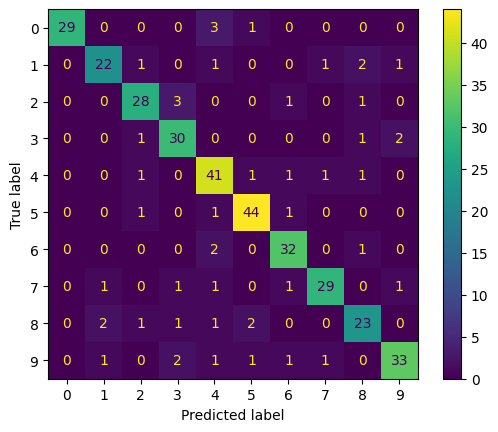

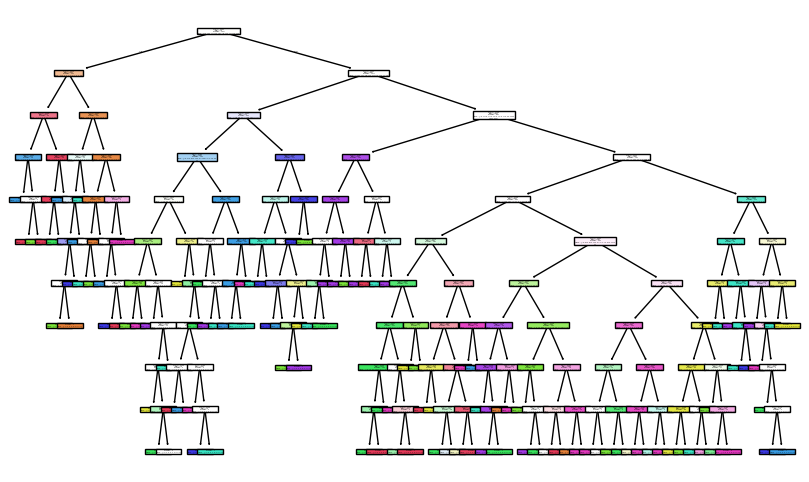

In [188]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'DigitsDTC') #DTC Function


In [189]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.1,  # 10% label noise
    random_state=42
)


In [190]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [191]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 1/6] END .......................max_depth=1;, score=0.896 total time=   0.0s
[CV 5/6] END .......................max_depth=1;, score=0.848 total time=   0.0s
[CV 4/6] END .......................max_depth=1;, score=0.955 total time=   0.0s
[CV 3/6] END .......................max_depth=1;, score=0.836 total time=   0.0s
[CV 6/6] END .......................max_depth=1;, score=0.818 total time=   0.0s
[CV 2/6] END .......................max_depth=2;, score=0.821 total time=   0.0s
[CV 1/6] END .......................max_depth=2;, score=0.866 total time=   0.0s
[CV 3/6] END .......................max_depth=2;, score=0.910 total time=   0.0s
[CV 2/6] END .......................max_depth=1;, score=0.836 total time=   0.0s
[CV 4/6] END .......................max_depth=2;, score=0.940 total time=   0.0s
[CV 5/6] END .......................max_depth=2;, score=0.894 total time=   0.0s
[CV 6/6] END .......................max_depth=2;

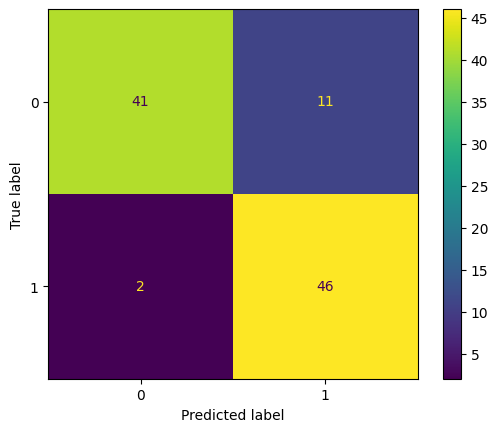

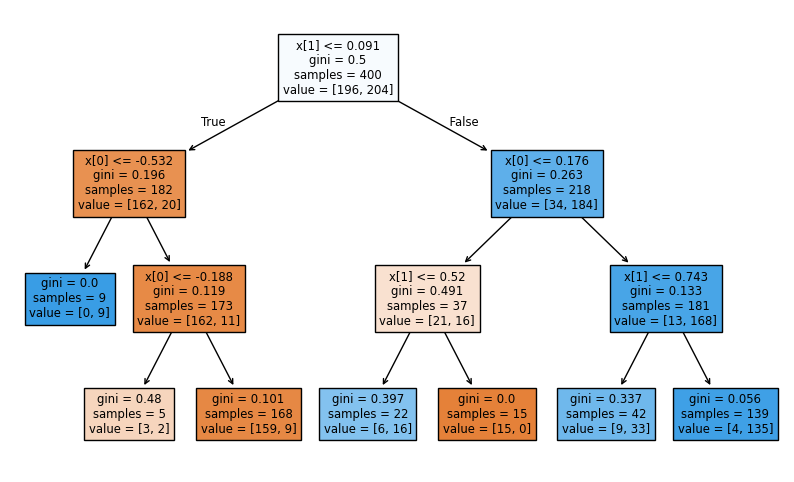

In [192]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'SyntheticDTC') #DTC Function


DTR

In [193]:
df_Housing = fetch_california_housing()
df_Housing = pd.DataFrame(data= np.c_[df_Housing['data'], df_Housing['target']])


In [194]:
x_train, x_test, y_train, y_test = eda(df_Housing,8)


Label Count = 3842
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
(20640, 9)


In [195]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 2/2] END .......................max_depth=1;, score=0.317 total time=   0.0s
[CV 2/2] END .......................max_depth=2;, score=0.448 total time=   0.0s
[CV 1/2] END .......................max_depth=1;, score=0.313 total time=   0.1s
[CV 1/2] END .......................max_depth=2;, score=0.444 total time=   0.1s
[CV 1/2] END .......................max_depth=3;, score=0.526 total time=   0.1s
[CV 1/2] END .......................max_depth=4;, score=0.574 total time=   0.1s
[CV 2/2] END .......................max_depth=5;, score=0.619 total time=   0.1s
[CV 2/2] END .......................max_depth=3;, score=0.521 total time=   0.2s
[CV 1/2] END .......................max_depth=7;, score=0.639 total time=   0.1s
[CV 1/2] END .......................max_depth=6;, score=0.630 total time=   0.2s
[CV 2/2] END .......................max_depth=4;, score=0.570 total time=   0.3s
[CV 2/2] END .......................max_depth=7;

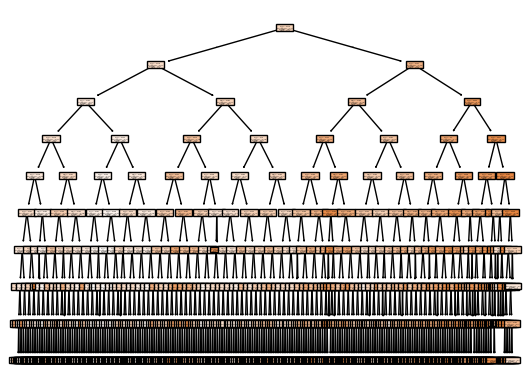

In [196]:
DTR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'HousesDTR') #DTR Function


In [197]:
df_Auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,49
1,15.0,8,350.0,165.0,3693,11.5,70,2,36
2,18.0,8,318.0,150.0,3436,11.0,70,2,231
3,16.0,8,304.0,150.0,3433,12.0,70,2,14
4,17.0,8,302.0,140.0,3449,10.5,70,2,161


In [198]:
x_train, x_test, y_train, y_test = eda(df_Auto,'mpg')


Label Count = 129
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
(398, 9)


In [199]:
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}] #parameters for DTC


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END .......................max_depth=1;, score=0.575 total time=   0.0s
[CV 2/2] END .......................max_depth=1;, score=0.557 total time=   0.0s
[CV 1/2] END .......................max_depth=2;, score=0.661 total time=   0.0s
[CV 2/2] END .......................max_depth=2;, score=0.667 total time=   0.0s
[CV 1/2] END .......................max_depth=3;, score=0.809 total time=   0.0s
[CV 2/2] END .......................max_depth=3;, score=0.699 total time=   0.0s
[CV 1/2] END .......................max_depth=4;, score=0.784 total time=   0.0s
[CV 2/2] END .......................max_depth=4;, score=0.711 total time=   0.0s
[CV 1/2] END .......................max_depth=5;, score=0.749 total time=   0.0s
[CV 2/2] END .......................max_depth=5;, score=0.760 total time=   0.0s
[CV 1/2] END .......................max_depth=6;, score=0.727 total time=   0.0s
[CV 2/2] END .......................max_depth=6;

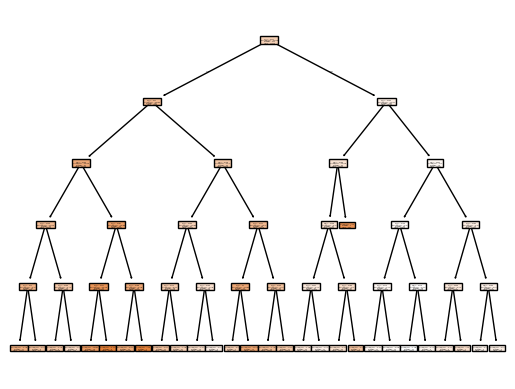

In [200]:
DTR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'CarsDTR') #DTR Function


In [201]:
df_CarPrice.head()


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,65,18,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,1,34,8,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,2,40,8,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,3,65,18,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,4,20,6,38,6,30000,0,1,1,22.77,1498,98.59,5,570000


In [202]:
df_CarPrice.drop(columns=['car_name','Unnamed: 0'],inplace=True)


In [203]:
x_train, x_test, y_train, y_test = eda(df_CarPrice,'selling_price')


Label Count = 1086
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64
(15411, 12)


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 1/6] END .......................max_depth=1;, score=0.480 total time=   0.0s
[CV 2/6] END .......................max_depth=1;, score=0.488 total time=   0.0s
[CV 3/6] END .......................max_depth=1;, score=0.260 total time=   0.0s
[CV 4/6] END .......................max_depth=1;, score=0.483 total time=   0.0s
[CV 5/6] END .......................max_depth=1;, score=0.482 total time=   0.0s
[CV 6/6] END .......................max_depth=1;, score=0.375 total time=   0.0s
[CV 1/6] END .......................max_depth=2;, score=0.518 total time=   0.0s
[CV 2/6] END .......................max_depth=2;, score=0.533 total time=   0.0s
[CV 3/6] END .......................max_depth=2;, score=0.336 total time=   0.0s
[CV 4/6] END .......................max_depth=2;, score=0.528 total time=   0.0s
[CV 5/6] END .......................max_depth=2;, score=0.551 total time=   0.0s
[CV 6/6] END .......................max_depth=2;

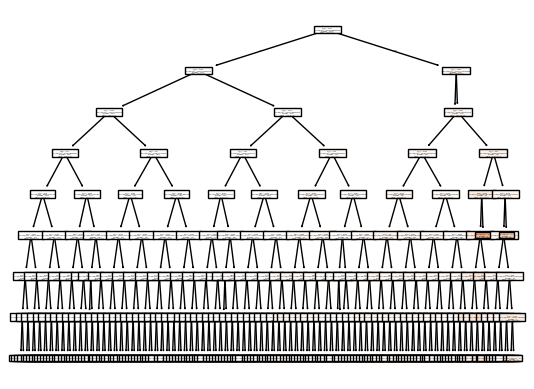

In [204]:
DTR_Func(x_train, x_test, y_train, y_test,parameters,6,3,'CarPriceDTR') #DTR Function


Random Forest Classification

In [205]:
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [206]:
x_train, x_test, y_train, y_test = eda(df_iris,'species')


Label Count = 3
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
(150, 5)


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 3/6] END .......................max_depth=1;, score=0.850 total time=   0.4s
[CV 5/6] END .......................max_depth=1;, score=0.950 total time=   0.4s
[CV 4/6] END .......................max_depth=1;, score=0.850 total time=   0.4s
[CV 2/6] END .......................max_depth=2;, score=1.000 total time=   0.5s
[CV 3/6] END .......................max_depth=2;, score=0.900 total time=   0.5s
[CV 6/6] END .......................max_depth=1;, score=0.900 total time=   0.9s
[CV 1/6] END .......................max_depth=2;, score=0.950 total time=   1.0s
[CV 5/6] END .......................max_depth=2;, score=1.000 total time=   0.6s
[CV 1/6] END .......................max_depth=3;, score=0.950 total time=   0.5s
[CV 2/6] END .......................max_depth=1;, score=1.000 total time=   1.3s
[CV 4/6] END .......................max_depth=3;, score=0.900 total time=   0.5s
[CV 3/6] END .......................max_depth=3;

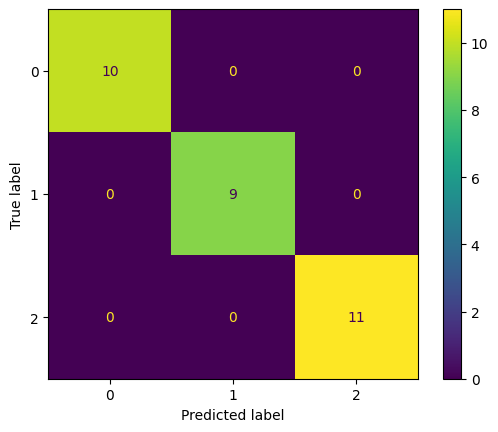

In [207]:
RFC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'irisRFC') #RFC Function


In [208]:
df_Housing.head()


,0,1,2,3,4,5,6,7,8
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [209]:
x_train, x_test, y_train, y_test = eda(df_Housing,8)


Label Count = 3842
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
(20640, 9)


In [210]:
RFR_Func(x_train, x_test, y_train, y_test,parameters,2,3,'HousesRFR') #RFR Function


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[CV 2/2] END .......................max_depth=1;, score=0.339 total time=   2.0s
[CV 1/2] END .......................max_depth=1;, score=0.349 total time=   2.7s
[CV 2/2] END .......................max_depth=3;, score=0.561 total time=   4.6s
[CV 1/2] END .......................max_depth=3;, score=0.567 total time=   4.7s
[CV 1/2] END .......................max_depth=2;, score=0.469 total time=   7.3s
[CV 1/2] END .......................max_depth=4;, score=0.624 total time=   7.3s
[CV 2/2] END .......................max_depth=2;, score=0.471 total time=   8.2s
[CV 2/2] END .......................max_depth=5;, score=0.670 total time=  10.6s
[CV 1/2] END .......................max_depth=5;, score=0.666 total time=  11.6s
[CV 2/2] END .......................max_depth=4;, score=0.617 total time=  14.9s
[CV 1/2] END .......................max_depth=6;, score=0.698 total time=  11.5s
[CV 2/2] END .......................max_depth=7;, score=0.731 total time=  13.9s
[CV 2/2] END ...............